In [1]:
%matplotlib inline
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

In [2]:
# An example of initial condition, the norm is the normalization factor.
def f_slow(x, a):
    norm = np.sqrt(12/(a*a*a))
    if x < a/2:
        return (norm*x)
    else:
        return (norm*(a-x))

In [3]:
print(f_slow(0, 10), f_slow(3, 10), f_slow(5, 10), f_slow(7, 10), f_slow(10, 10))

0.0 0.3286335345030997 0.5477225575051661 0.3286335345030997 0.0


In [4]:
# lambdaは無名関数を表す
# np.piecewiseによってfunctionをarrayとして扱うことが出来る！
def f(x, a):
    norm = np.sqrt(12/(a*a*a))
    return (np.piecewise(x, [x<a/2, x>=a/2],
                         [lambda x: norm*x ,
                          lambda x: norm*(a-x)]))

In [5]:
print(f(np.array([0,3,5,7,10], dtype = float), 10)) # dtypeで出力の型を指定している

[0.         0.32863353 0.54772256 0.32863353 0.        ]


In [6]:
#the TISE solutions
def psi_n(x, n, a):
    return (np.sqrt(2/a)*np.sin(n*x*np.pi/a))

In [7]:
# Here is an alternate initial function, which gives nice oscillatory behavious, see HW2
# def f(x, a):
#    norm = 1/np.sqrt(2)
#    return (norm*(psi_n(x, 1, a) + psi_n(x, 2, a)))

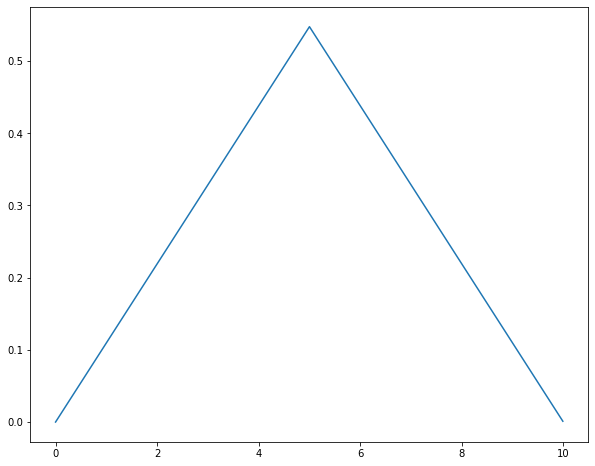

In [8]:
# a=10で初期条件をプロット
fig0 = plt.figure(figsize = (10, 8))
x_r = np.arange(0, 10, 0.01)
p0 = plt.plot(x_r, f(x_r, 10))

In [9]:
# c_nを積分によって計算
def int_fun(x, n, a):
    return (f(x, a)*psi_n(x, n, a))

# n%2 == 0 → integral is gonna be 0 because of the f*sin function(symmetric for x = a/2)
def c(n, a):
    if n == 0 or n%2 == 0: # If we know the even n are zero add:"or n%2 == 0" %は余を計算する演算子
        return(0)
    return (integrate.quad(int_fun, 0, a, args = (n, a), limit = 100)[0])

In [10]:
Nmax = 40 # cutoff for the c_n series. Higher = slower, more accurate sin(n*x)は積分するとnに反比例

In [11]:
a_1 = 10 # Width of the well
a_step = 10/100
n1 = np.array(range(Nmax)) #rangeはNmaxまでの整数を並べる
cx = np.array([c(n, a_1) for n in n1]) #n1と同じ大きさのc_nの配列を作成
print(cx[0], cx[1], cx[2], cx[3], cx[4])
print(np.sum(cx*cx), cx[Nmax-1]) #(規格化の確認, 最後の方の項が小さいことの確認)

0.0 0.9927408002342286 0.0 -0.11030453335935886 0.0
0.9999974367055641 -0.0006526895465042738


In [13]:
def E(n, a):
    return (n*n*np.pi*np.pi/(2*a*a)) # We set m = hbar = 1

def psi_f(x, t, a):
    norm = np.sqrt(2/a)
    out = 0
    n_r = np.array(range(Nmax))
    out = cx*norm*np.sin(x*n_r*np.pi/a)*np.exp(-1j*E(n_r, a)*t)
    s = np.sum(out)
    return(s)